In [31]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import sys
import pandas as pd

In [3]:
%store -r

In [11]:
os.environ['SPOTIPY_CLIENT_ID'] = spotify_id
os.environ['SPOTIPY_CLIENT_SECRET'] = spotify_secret
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://localhost:8080'

In [5]:
birdy_uri = 'spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Colores
OASIS
Vibras
Energía Lado B
Energía
Energía
La Familia B Sides
La Familia
La Familia
J Balvin Mix Tape


In [20]:
if len(sys.argv) > 1:
    name = ' '.join(sys.argv[1:])
else:
    name = 'Bad Bunny'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])

In [19]:
lz_uri = 'spotify:artist:4q3ewBCX7sLwd24euuV69X'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Yonaguni
audio    : https://p.scdn.co/mp3-preview/b856944d671f2d8f997c18684e45bd5f19a0d2db?cid=ce19241e504845f8bf8d77fc24bc09dd
cover art: https://i.scdn.co/image/ab67616d0000b27364afd6879102d03460bd3ad9

track    : AM Remix
audio    : https://p.scdn.co/mp3-preview/e057743375795d2e5a066a32ae1c035a08084715?cid=ce19241e504845f8bf8d77fc24bc09dd
cover art: https://i.scdn.co/image/ab67616d0000b2732ae66aa58208495074d88fd0

track    : Volando - Remix
audio    : https://p.scdn.co/mp3-preview/79d49a10d7a166e4cf86baf6f0162c8068e877a6?cid=ce19241e504845f8bf8d77fc24bc09dd
cover art: https://i.scdn.co/image/ab67616d0000b273c06f8626913962e921586190

track    : LA NOCHE DE ANOCHE
audio    : https://p.scdn.co/mp3-preview/a98b639351290bdb69b865ad10c2e0f5dbe0c4cd?cid=ce19241e504845f8bf8d77fc24bc09dd
cover art: https://i.scdn.co/image/ab67616d0000b273005ee342f4eef2cc6e8436ab

track    : DÁKITI
audio    : https://p.scdn.co/mp3-preview/edd9bea2e66b14169f8bbfa45a78b6599b14160a?cid=ce19241e504845f

TypeError: can only concatenate str (not "NoneType") to str

In [ ]:
https://open.spotify.com/artist/4q3ewBCX7sLwd24euuV69X?si=VDYE-tAdQle6qIW9ZO9oaw&dl_branch=1

In [43]:
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

results = sp.current_user_saved_tracks(limit = 50)
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 J Balvin  –  Wherever I May Roam
1 Alex Rose  –  Me Fije
2 Mora  –  Volando - Remix
3 Sech  –  911 - Remix
4 Lauv  –  I Like Me Better
5 Piso 21  –  Tan Bonita
6 Years & Years  –  Desire - Gryffin Remix
7 MYA  –  2:50 Remix
8 Nio Garcia  –  AM Remix
9 Boza  –  Ella
10 Mau y Ricky  –  3 de La Mañana
11 Dylan Fuentes  –  báilame en los besos (with Danny Ocean & Daramola)
12 Bad Bunny  –  Yonaguni
13 Big Soto  –  Cuando Quieras - Remix
14 J Balvin  –  Poblado - Remix
15 Nio Garcia  –  AM
16 Lérica  –  Hamaca
17 Wisin  –  Fiel - Remix
18 Maria Becerra  –  Cazame
19 J Balvin  –  OTRO FILI
20 Noriel  –  Mala Influencia
21 Halsey  –  Without Me (with Juice WRLD)
22 J Balvin  –  Qué Más Pues?
23 Lunay  –  VUDÚ
24 Lunay  –  TODO O NADA
25 Feid  –  PURRITO APA
26 Danny Ocean  –  Besarnos de cero
27 Ozuna  –  Vaina Loca
28 Micro TDH  –  EL TREN
29 TINI  –  Miénteme
30 Big Soto  –  Lloro :'(
31 Chris Brown  –  Loyal (East Coast Version) (feat. Lil Wayne & French Montana)
32 Big Soto  –  Estrés
3

In [45]:
added_tracks = pd.DataFrame(results['items'])
track_info = pd.json_normalize(added_tracks['track'])
pd.json_normalize(track_info['artists'])

AttributeError: 'list' object has no attribute 'values'

Necesito escapar la fecha en que agregue la cancion.
Y ver que otras variables me sirven.

In [48]:
track_info.columns

Index(['artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'href', 'id', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type', 'uri', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'external_ids.isrc',
       'external_urls.spotify'],
      dtype='object')

In [56]:
pd.json_normalize(track_info['artists'][1])

,href,id,name,type,uri,external_urls.spotify
0,https://api.spotify.com/v1/artists/2DspEsT7UXG...,2DspEsT7UXGKd2VaaedgG4,Alex Rose,artist,spotify:artist:2DspEsT7UXGKd2VaaedgG4,https://open.spotify.com/artist/2DspEsT7UXGKd2...
1,https://api.spotify.com/v1/artists/1mcTU81TzQh...,1mcTU81TzQhprhouKaTkpq,Rauw Alejandro,artist,spotify:artist:1mcTU81TzQhprhouKaTkpq,https://open.spotify.com/artist/1mcTU81TzQhprh...


In [63]:
track_info['artists'][1]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2DspEsT7UXGKd2VaaedgG4'},
  'href': 'https://api.spotify.com/v1/artists/2DspEsT7UXGKd2VaaedgG4',
  'id': '2DspEsT7UXGKd2VaaedgG4',
  'name': 'Alex Rose',
  'type': 'artist',
  'uri': 'spotify:artist:2DspEsT7UXGKd2VaaedgG4'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/1mcTU81TzQhprhouKaTkpq'},
  'href': 'https://api.spotify.com/v1/artists/1mcTU81TzQhprhouKaTkpq',
  'id': '1mcTU81TzQhprhouKaTkpq',
  'name': 'Rauw Alejandro',
  'type': 'artist',
  'uri': 'spotify:artist:1mcTU81TzQhprhouKaTkpq'}]

In [66]:
track_info

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,...,album.id,album.images,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify
0,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,158573,False,https://api.spotify.com/v1/tracks/7qCHqtiSiX3T...,7qCHqtiSiX3T09ErW718yQ,False,Wherever I May Roam,56,...,0WNfOMxwCMjYOjDWlGsgNA,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Wherever I May Roam,2021-07-21,day,1,album,spotify:album:0WNfOMxwCMjYOjDWlGsgNA,QMKHM2100027,https://open.spotify.com/track/7qCHqtiSiX3T09E...
1,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,202306,True,https://api.spotify.com/v1/tracks/6Et5KimMg3IX...,6Et5KimMg3IXwD6lJPGmQw,False,Me Fije,84,...,14FrKuNUxsU8eEooOVW1DC,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Me Fije,2021-03-18,day,1,album,spotify:album:14FrKuNUxsU8eEooOVW1DC,QM4TX2162142,https://open.spotify.com/track/6Et5KimMg3IXwD6...
2,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,273474,True,https://api.spotify.com/v1/tracks/0G2zPzWqVjR6...,0G2zPzWqVjR68iNPmx2TBe,False,Volando - Remix,88,...,4MCZWUKxkvdMITh4KapBKX,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Volando (Remix),2021-07-08,day,1,album,spotify:album:4MCZWUKxkvdMITh4KapBKX,QMFME2105596,https://open.spotify.com/track/0G2zPzWqVjR68iN...
3,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,208631,True,https://api.spotify.com/v1/tracks/27RSJHEA99Y0...,27RSJHEA99Y0Vsow7nA37A,False,911 - Remix,83,...,57ppCWTeAnqooyrR4DzbwR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",911 (Remix),2021-07-09,day,1,album,spotify:album:57ppCWTeAnqooyrR4DzbwR,QM9WM2100036,https://open.spotify.com/track/27RSJHEA99Y0Vso...
4,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,197436,False,https://api.spotify.com/v1/tracks/2P91MQbaiQOf...,2P91MQbaiQOfbiz9VqhqKQ,False,I Like Me Better,82,...,7lqieLm717j9Z8JrG7POkS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",I met you when I was 18. (the playlist),2018-05-31,day,17,album,spotify:album:7lqieLm717j9Z8JrG7POkS,GBWWP1702907,https://open.spotify.com/track/2P91MQbaiQOfbiz...
5,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,211998,False,https://api.spotify.com/v1/tracks/6mm3K0yWp6uz...,6mm3K0yWp6uzfOMuipM9Zh,False,Tan Bonita,81,...,4ARUAVQnIDB02yVO8uvaJE,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",El Amor En Los Tiempos Del Perreo,2021-03-18,day,15,album,spotify:album:4ARUAVQnIDB02yVO8uvaJE,MXF152100006,https://open.spotify.com/track/6mm3K0yWp6uzfOM...
6,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,268840,False,https://api.spotify.com/v1/tracks/6ctWstoouxCc...,6ctWstoouxCcvuTsd4cHNS,False,Desire - Gryffin Remix,65,...,2EaUj2cxVeL2DhATcN9xcL,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Desire (Gryffin Remix),2015-07-31,day,1,album,spotify:album:2EaUj2cxVeL2DhATcN9xcL,GBUM71504341,https://open.spotify.com/track/6ctWstoouxCcvuT...
7,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,231708,False,https://api.spotify.com/v1/tracks/74znaWw1hmQB...,74znaWw1hmQBusGPSOuTFy,False,2:50 Remix,85,...,0hbwAcjGBGP2gutKpQHA8d,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",2:50 Remix,2021-06-21,day,1,album,spotify:album:0hbwAcjGBGP2gutKpQHA8d,ARF102100135,https://open.spotify.com/track/74znaWw1hmQBusG...
8,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,261334,True,https://api.spotify.com/v1/tracks/05bfbizlM5AX...,05bfbizlM5AX6Mf1RRyMho,False,AM Remix,93,...,1jTRS4KS666BesH1GUHyEV,"

In [81]:
track_analysis = pd.json_normalize(sp.audio_analysis('6mm3K0yWp6uzfOMuipM9Zh'))
track_analysis

,bars,beats,sections,segments,tatums,meta.analyzer_version,meta.platform,meta.detailed_status,meta.status_code,meta.timestamp,...,track.mode,track.mode_confidence,track.codestring,track.code_version,track.echoprintstring,track.echoprint_version,track.synchstring,track.synch_version,track.rhythmstring,track.rhythm_version
0,"[{'start': 2.39414, 'duration': 2.15823, 'conf...","[{'start': 0.78731, 'duration': 0.53291, 'conf...","[{'start': 0.0, 'duration': 18.06143, 'confide...","[{'start': 0.0, 'duration': 0.32454, 'confiden...","[{'start': 0.78731, 'duration': 0.26645, 'conf...",4.0.0,Linux,OK,0,1615421363,...,1,0.393,eJxVnAmi67gNBK_iI4iiuN3_YlPVkJ__JJnkkZYoLgC6sT...,3.15,eJzNnQl25jiSpK9EYsdxsN7_CPOZMyr-SL0i1NWaeNUz-b...,4.12,eJxtmAuW5Sqvg6eSIYQ3zH9i1_pkdqX_e1ZXp1KEgB-yLF...,1.0,eJylXAmuJLmOu0oeIbzb97_YmKQkO_Jl9QwwwG_8qozFtl...,1.0


In [83]:
beats = pd.json_normalize(track_analysis['beats'][0])
beats

,start,duration,confidence
0,0.78731,0.53291,0.337
1,1.32022,0.53606,0.909
2,1.85628,0.53785,0.723
3,2.39414,0.53853,0.685
4,2.93266,0.53958,0.304
...,...,...,...
382,207.52354,0.54279,0.801
383,208.06633,0.54370,0.867
384,208.61003,0.54399,0.876
385,209.15404,0.55465,0.796


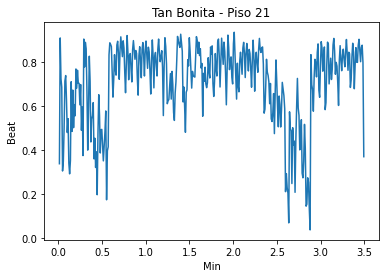

In [86]:
import matplotlib.pyplot as plt

plt.plot(beats.start/60, beats.confidence)
plt.title('Tan Bonita - Piso 21')
plt.xlabel('Min')
plt.ylabel('Beat')
plt.show()

In [80]:
track_features = pd.json_normalize(sp.audio_features('6mm3K0yWp6uzfOMuipM9Zh'))
track_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.82,0.804,9,-7.226,1,0.0528,0.175,0.00215,0.064,0.844,110.982,audio_features,6mm3K0yWp6uzfOMuipM9Zh,spotify:track:6mm3K0yWp6uzfOMuipM9Zh,https://api.spotify.com/v1/tracks/6mm3K0yWp6uz...,https://api.spotify.com/v1/audio-analysis/6mm3...,211998,4
